In [3]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
import powerlaw

import sys
sys.path.append('../src')
import populations

In [4]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 13

In [5]:
L_grid = ['Lx_iso', 'Lx1', 'Lx1_vis', 'Lx1_prec', 'Lx1_prec_vis']
L_dict = {'Lx_iso':r'$L_{\mathrm{iso}}$',
          'Lx1':r'$L_{\mathrm{x}}$',
          'Lx1_vis':r'$L_{\mathrm{x,vis}}$',
          'Lx1_prec':r'$L_{\mathrm{x,prec}}$',
          'Lx1_prec_vis':r'$L_{\mathrm{x,prec,vis}}$'}

In [6]:
df = populations.startrack_v2_mt_1_all(nrows=10000)
pop = populations.Population(df)

In [7]:
samp = pop.sample_systems(0.5, subset='all', return_df=True)
L = samp['Lx1'].values

<AxesSubplot:>

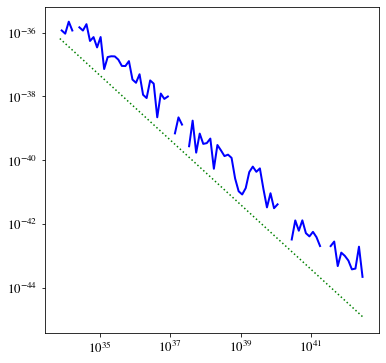

In [8]:
fig, ax = plt.subplots(figsize=(6,6))

powerlaw.plot_pdf(L, ax=ax, color='b', linewidth=2)     # Plot PDF for original data
fit = powerlaw.Fit(L, xmin=1, discrete=True)            # Fit data using a power law Clauset(2007)
fit.power_law.plot_pdf(ax=ax, linestyle=':', color='g') # Plot the fitted powerlaw's PDF.


In [9]:
fit.xmin

1.0

Calculating best minimal value for power law fit
/home/x1/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/x1/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
/home/x1/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/x1/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


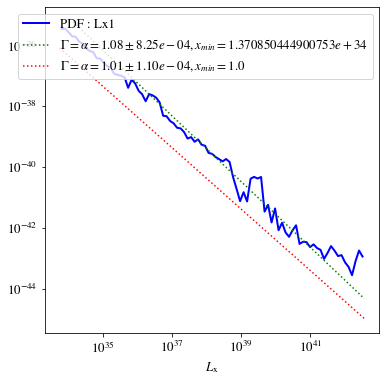

In [10]:
L_k = 'Lx1'

fig, ax = plt.subplots(figsize=(6,6))
samp = pop.sample_systems(0.5, size=10000, subset='all', return_df=True)
L = samp[L_k].values

fit = powerlaw.Fit(L)
powerlaw.plot_pdf(L, ax=ax, color='b', linewidth=2, label=f'PDF : {L_k}')     # Plot PDF for original data

fit = powerlaw.Fit(L, discrete=True)            # Fit data using a power law Clauset (2007)
fit.power_law.plot_pdf(ax=ax, linestyle=':', color='g', label=rf'$\Gamma = \alpha = {fit.alpha:.2f} \pm {fit.sigma:.2e}, x_{{min}}={fit.xmin}$') # Plot the fitted powerlaw's PDF.

fit = powerlaw.Fit(L, xmin=1, discrete=True)            # Fit data using a power law Clauset (2007)
fit.power_law.plot_pdf(ax=ax, linestyle=':', color='red', label=rf'$\Gamma = \alpha = {fit.alpha:.2f} \pm {fit.sigma:.2e}, x_{{min}}={fit.xmin}$') # Plot the fitted powerlaw's PDF.

ax.set_xlabel(L_dict[L_k])
plt.legend()

Calculating best minimal value for power law fit
/home/x1/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/x1/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
/home/x1/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/x1/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/x1/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/x1/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid valu

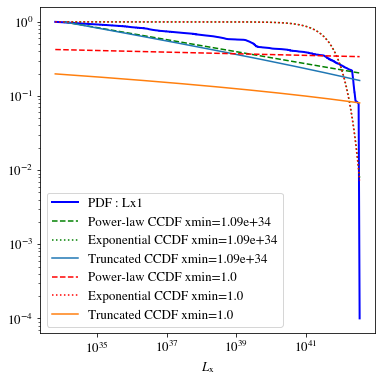

In [11]:
L_k = 'Lx1'

fig, ax = plt.subplots(figsize=(6,6))
samp = pop.sample_systems(0.5, size=10000, subset='all', return_df=True)
L = samp[L_k].values

fit = powerlaw.Fit(L)
powerlaw.plot_ccdf(L, ax=ax, color='b', linewidth=2, label=f'PDF : {L_k}')     # Plot PDF for original data

fit = powerlaw.Fit(L, discrete=True)            # Fit data using a power law Clauset (2007)
fit.power_law.plot_ccdf(ax=ax, linestyle='--', color='g', label=rf'Power-law CCDF xmin={fit.xmin:.2e}') # Plot the fitted powerlaw's PDF.
fit.exponential.plot_ccdf(ax=ax, linestyle=':', color='g', label=rf'Exponential CCDF xmin={fit.xmin:.2e}') # Plot the fitted powerlaw's PDF.
fit.truncated_power_law.plot_ccdf(ax=ax, label=rf'Truncated CCDF xmin={fit.xmin:.2e}') # Plot the fitted powerlaw's PDF.

fit = powerlaw.Fit(L, xmin=1, discrete=True)            # Fit data using a power law Clauset (2007)
fit.power_law.plot_ccdf(ax=ax, linestyle='--', color='red', label=rf'Power-law CCDF xmin={fit.xmin}') # Plot the fitted powerlaw's PDF.
fit.exponential.plot_ccdf(ax=ax, linestyle=':', color='red', label=rf'Exponential CCDF xmin={fit.xmin}') # Plot the fitted powerlaw's PDF.
fit.truncated_power_law.plot_ccdf(ax=ax, label=rf'Truncated CCDF xmin={fit.xmin}') # Plot the fitted powerlaw's PDF.


ax.set_xlabel(L_dict[L_k])
plt.legend()

In [12]:
fit.supported_distributions

{'power_law': powerlaw.Power_Law,
 'lognormal': powerlaw.Lognormal,
 'exponential': powerlaw.Exponential,
 'truncated_power_law': powerlaw.Truncated_Power_Law,
 'stretched_exponential': powerlaw.Stretched_Exponential,
 'lognormal_positive': powerlaw.Lognormal_Positive}

In [13]:
fit.xmax


In [14]:
fit.distribution_compare('power_law', 'exponential')

(6108444.101150679, 0.0)

Calculating best minimal value for power law fit
/home/x1/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/x1/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


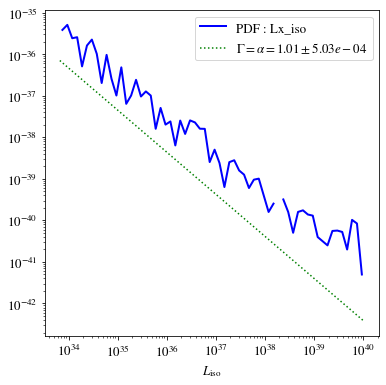

In [15]:
L_k = 'Lx_iso'

fig, ax = plt.subplots(figsize=(6,6))
samp = pop.sample_systems(0.5, subset='all', return_df=True)
L = samp[L_k].values

fit = powerlaw.Fit(L)
powerlaw.plot_pdf(L, ax=ax, color='b', linewidth=2, label=f'PDF : {L_k}')     # Plot PDF for original data
fit = powerlaw.Fit(L, xmin=1, discrete=True)            # Fit data using a power law Clauset (2007)
fit.power_law.plot_pdf(ax=ax, linestyle=':', color='g', label=rf'$\Gamma = \alpha = {fit.alpha:.2f} \pm {fit.sigma:.2e}$') # Plot the fitted powerlaw's PDF.
ax.set_xlabel(L_dict[L_k])
plt.legend()

Calculating best minimal value for power law fit
/home/x1/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/x1/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


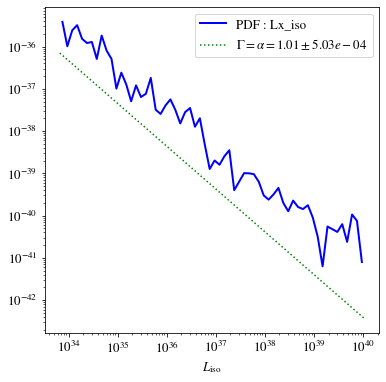

In [16]:
L_k = 'Lx_iso'

fig, ax = plt.subplots(figsize=(6,6))
samp = pop.sample_systems(0.5, subset='all', return_df=True)
L = samp[L_k].values

fit = powerlaw.Fit(L)
powerlaw.plot_pdf(L, ax=ax, color='b', linewidth=2, label=f'PDF : {L_k}')     # Plot PDF for original data
fit = powerlaw.Fit(L, xmin=1, discrete=True)            # Fit data using a power law Clauset (2007)
fit.power_law.plot_pdf(ax=ax, linestyle=':', color='g', label=rf'$\Gamma = \alpha = {fit.alpha:.2f} \pm {fit.sigma:.2e}$') # Plot the fitted powerlaw's PDF.
ax.set_xlabel(L_dict[L_k])
plt.legend()

[Text(0, 0.1, '0.1'),
 Text(0, 0.25, '0.25'),
 Text(0, 0.5, '0.5'),
 Text(0, 0.75, '0.75'),
 Text(0, 1.0, '1')]

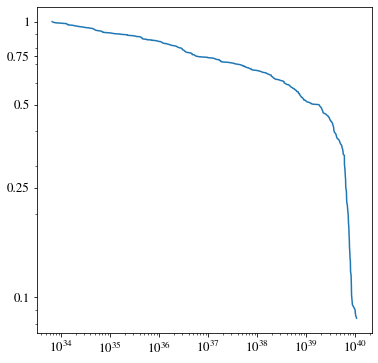

In [17]:
fig, ax = plt.subplots(figsize=(6,6))
fit.plot_ccdf(ax=ax)
ax.set_yticks([0.1, 0.25, 0.5, 0.75, 1])
ax.set_yticklabels([0.1, 0.25, 0.5, 0.75, 1])


In [18]:
ccdf = fit.ccdf()

In [19]:
ccdf = list(ccdf)
ccdf[1] = ccdf[1] * 500

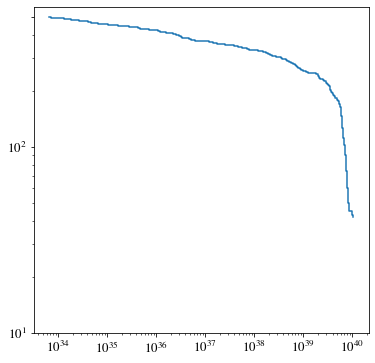

In [20]:
fig, ax = plt.subplots(figsize=(6,6))
plt.step(ccdf[0], ccdf[1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_yticks([10, 100, 500])